In [1]:
import cv2
cv2.__version__

'4.2.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 219.5, 219.5, -0.5)

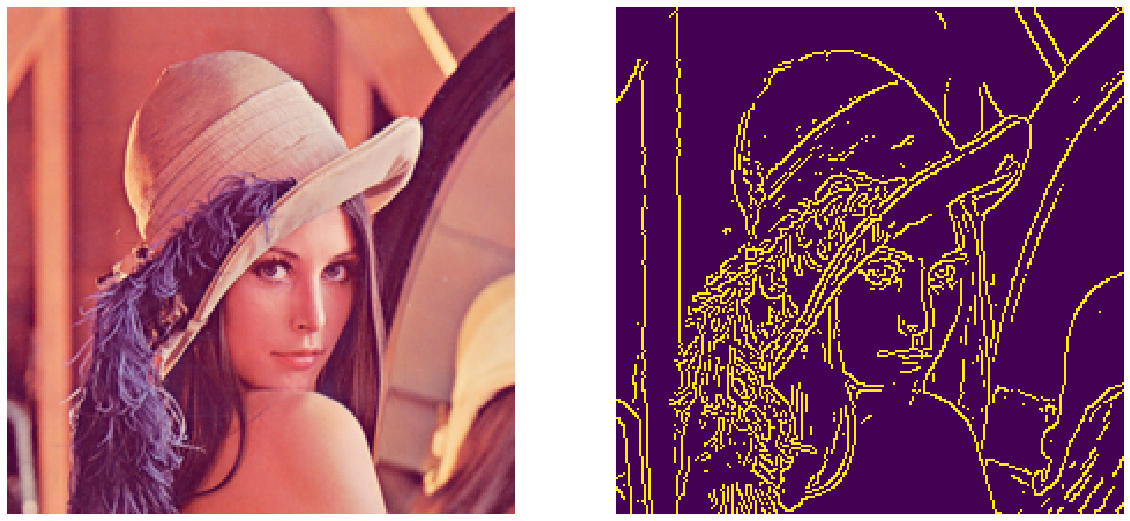

In [11]:
img = cv2.imread('img/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Canny detection without blurring
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges)
plt.axis('off')

In [14]:
# Set the lower and upper threshold
med_val = np.median(img)
lower = int(max(0, .8*med_val))
upper = int(min(255, 1.2*med_val))

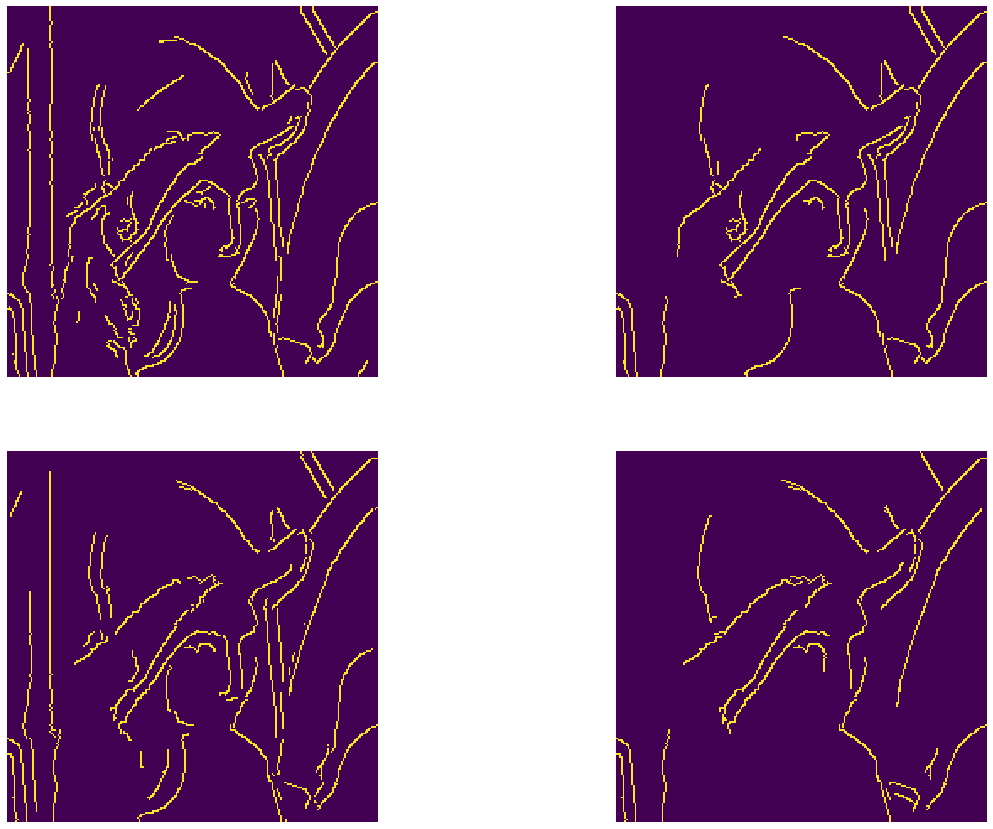

In [28]:
# Blurring with ksize = 5 
img_k5 = cv2.blur(img, ksize = (5, 5))
# Canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper)
edges_k5_2 = cv2.Canny(img_k5, lower, upper+100)
# Blurring with ksize = 9 
img_k9 = cv2.blur(img, ksize = (7, 7))
# Canny detection with different thresholds
edges_k9 = cv2.Canny(img_k9, lower, upper)
edges_k9_2 = cv2.Canny(img_k9, lower-150, upper+50)
# Plot the images
images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [30]:
img = cv2.imread('img/bw.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Apply Harris corner detection
dst = cv2.cornerHarris(img_gray, blockSize = 2, ksize = 3, k = .04)

(-0.5, 317.5, 219.5, -0.5)

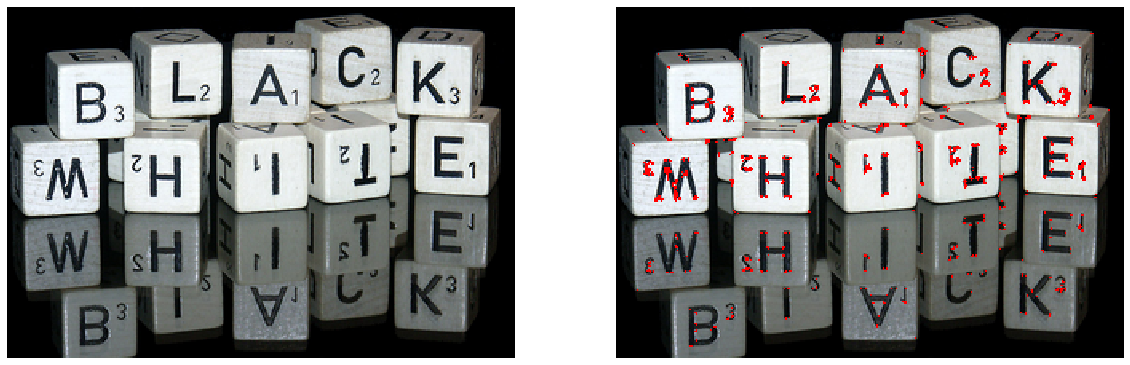

In [31]:
# Spot the detected corners
img_2 = img.copy()
img_2[dst>0.01*dst.max()]=[255,0,0]
# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

(-0.5, 317.5, 219.5, -0.5)

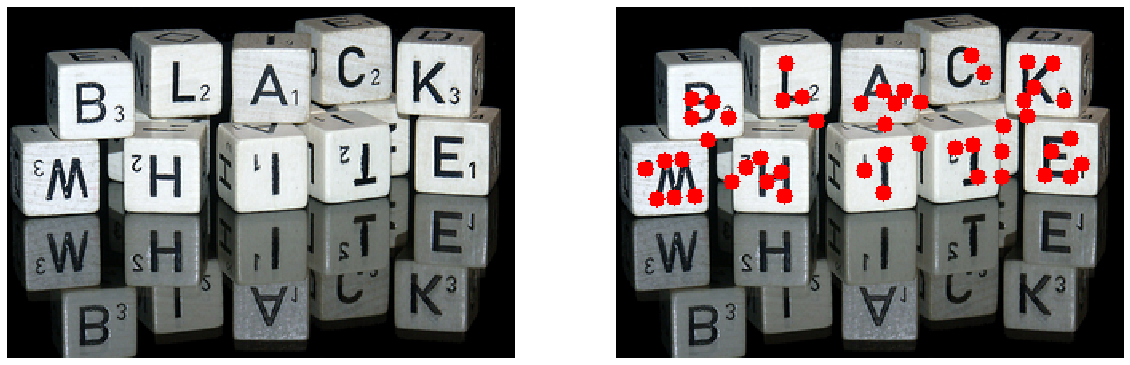

In [37]:
# Apply Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(img_gray, maxCorners = 50, 
                                  qualityLevel = 0.1, 
                                  minDistance = 10)
corners = np.int0(corners)
# Spot the detected corners
img_2 = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_2, center = (x, y), 
               radius = 5, color = 255, thickness = -1)
# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

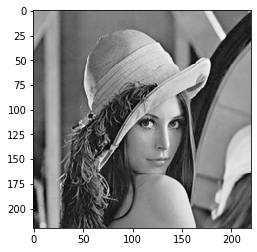

In [39]:
img = cv2.imread('img/lenna.png')
# Find the region of interest
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

In [47]:
# Load Cascade filter 
face_cascade = cv2.CascadeClassifier('/Users/benstewart/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml')

(-0.5, 219.5, 219.5, -0.5)

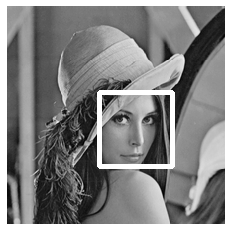

In [48]:
# Create the face detecting function 
def detect_face(img):
    
    img_copy = img.copy()
    face_rects = face_cascade.detectMultiScale(img_copy, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_copy
# Detect the face
img_detected = detect_face(img)
plt.imshow(img_detected, cmap = 'gray')
plt.axis('off')

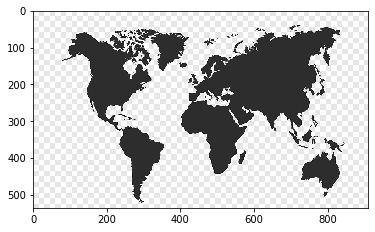

In [50]:
# Load the image
img = cv2.imread('img/map.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

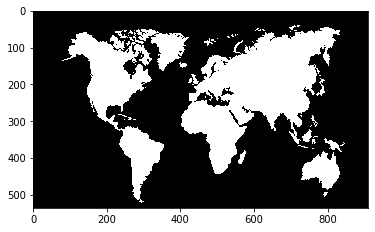

In [51]:
# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
# Apply the thresholding
a = img_gray.max()  
_, thresh = cv2.threshold(img_gray, a/2+60, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

In [53]:
# Find the contour of the figure 
contours, hierarchy = cv2.findContours(
                                   image = thresh, 
                                   mode = cv2.RETR_TREE, 
                                   method = cv2.CHAIN_APPROX_SIMPLE)

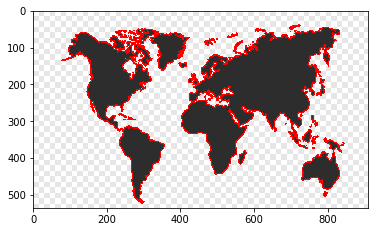

In [54]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(img_copy)

In [55]:
# The first order of the contours
c_0 = contours[0]
# image moment
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03'])


In [56]:
# The area of contours 
print("1st Contour Area : ", cv2.contourArea(contours[0]))
print("2nd Contour Area : ", cv2.contourArea(contours[1]))
print("3rd Contour Area : ", cv2.contourArea(contours[2]))

1st Contour Area :  78715.5
2nd Contour Area :  37131.5
3rd Contour Area :  6225.0


In [57]:
# The arc length of contours 
print(cv2.arcLength(contours[0], closed = True)) 
print(cv2.arcLength(contours[0], closed = False)) 

2692.799324154854
2685.799324154854


In [58]:
# The centroid point
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

In [59]:
# The extreme points
l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])
pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

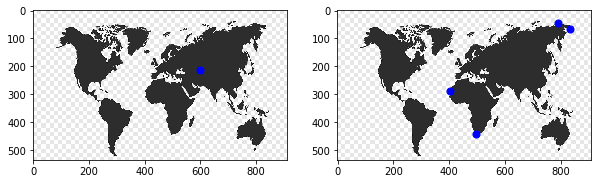

In [61]:
# Plot the points
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.scatter([cx], [cy], c = 'b', s = 50)
plt.subplot(1, 2, 2)
plt.imshow(img, cmap = 'gray')
plt.scatter(xcor, ycor, c = 'b', s = 50)

In [62]:
# The first order of the contours
c_0 = contours[0]
# Get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)
# Draw a straight rectangle with the points
img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

In [63]:
# Get the 4 points of the bounding rectangle with the minimum area
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')
# Draw a contour with the points 
img_copy = img.copy()
img_box_2 = cv2.drawContours(img_copy, contours = [box], 
                             contourIdx = -1, 
                             color = (255, 0, 0), thickness = 2)

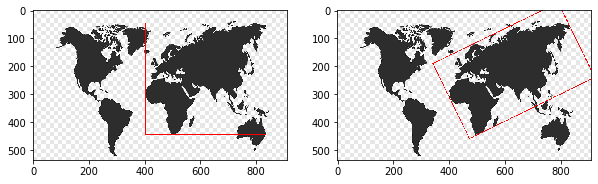

In [64]:
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(img_box)
plt.subplot(1, 2, 2); plt.imshow(img_box_2)

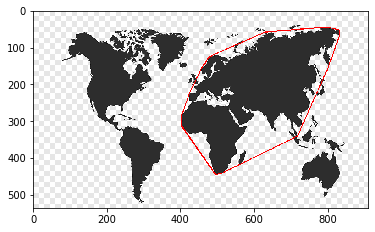

In [65]:
# Detect the convex contour
hull = cv2.convexHull(c_0)
img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, contours = [hull], 
                            contourIdx = 0, 
                            color = (255, 0, 0), thickness = 2)
plt.imshow(img_hull)